# Data merging and visualization

## The demo is to show how to merge pre-computed tag counts with RNA counts, and generate umap plots for visualizing cell types based on antibody signals

In [19]:
from cite_count import AB_count,RNA_count,CITE_count

### To merge antibody tag counts with RNA counts, first you will need to create a AB_count object with a project name, which will be the name of directory for storing cache files.  

In [2]:
test_AB = AB_count(PROJ_NAME = 'combined_analysis')

In [3]:
test_AB.import_counts('CITE_Seq_Result.csv')

In [21]:
test_AB.df_merge_UMI_mx

,CD3,CD4,CD45RO,CD14,CD8a,CD62L,CD25
cell_code,,,,,,,
AAACCCAAGATGAACT,247,130,51,1,1,7,0
AAACCCAAGCAAGCCA,1,1,4,2,1,0,0
AAACCCACAGAGAGGG,3,15,49,142,2,3,0
AAACCCAGTAGCACGA,5,9,13,73,0,7,0
AAACCCATCGATTCCC,14,6,18,201,3,1,0
...,...,...,...,...,...,...,...
TTTGTTGCACCCAACG,475,180,81,3,0,12,34
TTTGTTGCATGAGTAA,73,2,1,1,0,1,0
TTTGTTGGTCCTGGGT,266,0,102,5,184,0,5


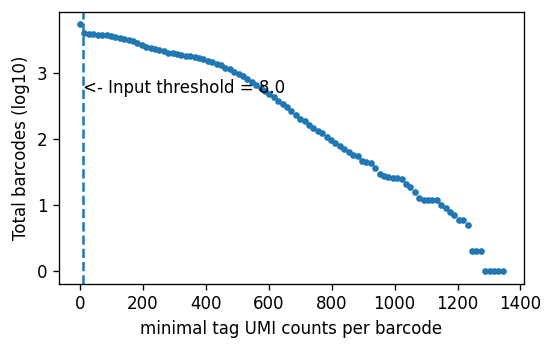

In [4]:
# The automatic filtering algrithem works well with unfiltered data but can not fit filtered tag coutns; if you have pre-filtered dataset, please either skip this step or manually set a thershold for filtering
test_AB.qc_tag_count(dpi = 120,THRESHOLD_UMI = 8, saturation='half')

Best model with Gaussian distribution has 2 populations with threshold at 20
Best model with Gaussian distribution has 2 populations with threshold at 24
Best model with Gaussian distribution has 3 populations with threshold at 7
Best model with Gaussian distribution has 2 populations with threshold at 9
Best model with Rayleigh distribution has 1 populations with threshold at 1
Best model with Gaussian distribution has 2 populations with threshold at 5
Best model with Rayleigh distribution has 1 populations with threshold at 1


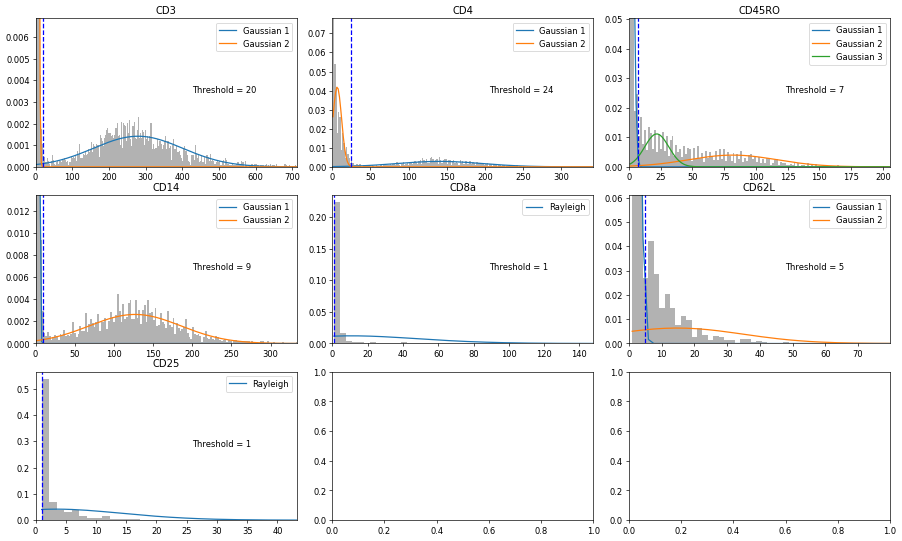

In [5]:
test_AB.qc_tag_label(max_population = 5, min_population_size = 0.2, confidence_interval = 0.95,dpi = 60,verbose=False,view = True)
test_AB.get_tag_label()

In [6]:
test_RNA = RNA_count(PROJ_NAME = 'combined_analysis')
test_RNA.import_h5('INPUT/filtered_feature_bc_matrix.h5',overwrite = False)

In [7]:
# To get UNI count from scRNA-Seq data
test_RNA.df_RNA_count.head()

,MIR1302-2HG,AL627309.1,AL627309.3,AL627309.4,AL669831.2,AL669831.5,FAM87B,LINC00115,FAM41C,AL645608.7,...,MT-ND6,MT-CYB,BX004987.1,AC145212.1,MAFIP,AC011043.1,AL592183.1,AC007325.4,AL354822.1,AC240274.1
AAACCCAAGATGAACT,0,0,0,0,0,0,1,0,0,0,...,6,58,0,0,0,0,0,0,0,0
AAACCCACAACACAGG,0,0,0,0,0,0,0,0,0,0,...,0,4,0,0,0,0,0,0,0,0
AAACCCACAGAGAGGG,0,0,0,0,0,0,0,0,0,0,...,0,82,0,0,0,0,1,0,0,0
AAACCCAGTAGCACGA,0,0,0,0,0,1,0,0,0,0,...,4,105,0,0,0,0,1,0,0,0
AAACCCATCGATTCCC,0,0,0,0,0,0,0,1,0,0,...,3,103,0,0,0,0,0,0,0,0


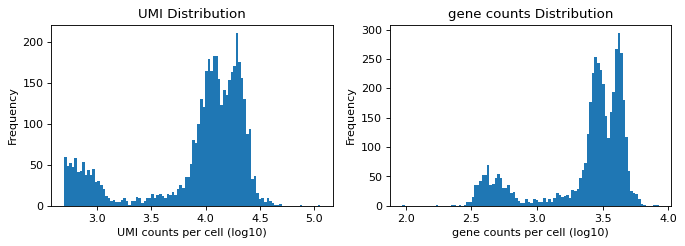

In [8]:
test_RNA.qc_results()

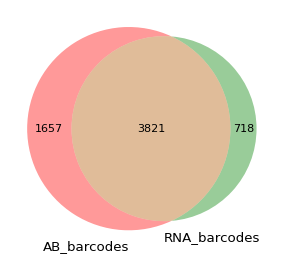

In [9]:
test_merge = CITE_count(test_AB,test_RNA)
test_merge.merge_data(dpi = 80,view=True)

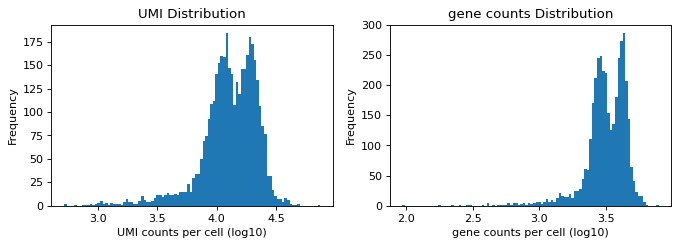

In [10]:
test_merge.qc_results()

In [11]:
test_merge.group_aliquot()#min_cell_number=100,min_portion=0.6, max_depth=4, min_dist=0.3)

In [12]:
test_merge.plot_tree()

labeled_cells ID[0] (3821)
├── CD3+/CD14- ID[1] (2064)
│   ├── CD45RO+/CD62L- ID[5] (1125)
│   ├── CD45RO-/CD62L+ ID[6] (236)
│   ├── CD45RO+/CD62L+ ID[7] (482)
│   └── CD45RO-/CD62L- ID[8] (221)
├── CD3-/CD14+ ID[2] (1658)
├── CD3+/CD14+ ID[3] (67)
└── CD3-/CD14- ID[4] (32)


In [13]:
# test_merge.normalization()#group_norm = test_merge.get_group_by_depth(0),ncol=4,color_scheme='hls',view = False)

In [14]:
test_merge.export_to_scanpy(tag_export = 'count')

AnnData object with n_obs × n_vars = 3821 × 21640 
    obs: 'CD3', 'CD4', 'CD45RO', 'CD14', 'CD8a', 'CD62L', 'CD25'

In [15]:
test_merge.PCA(n_components=100)
test_merge.umap()

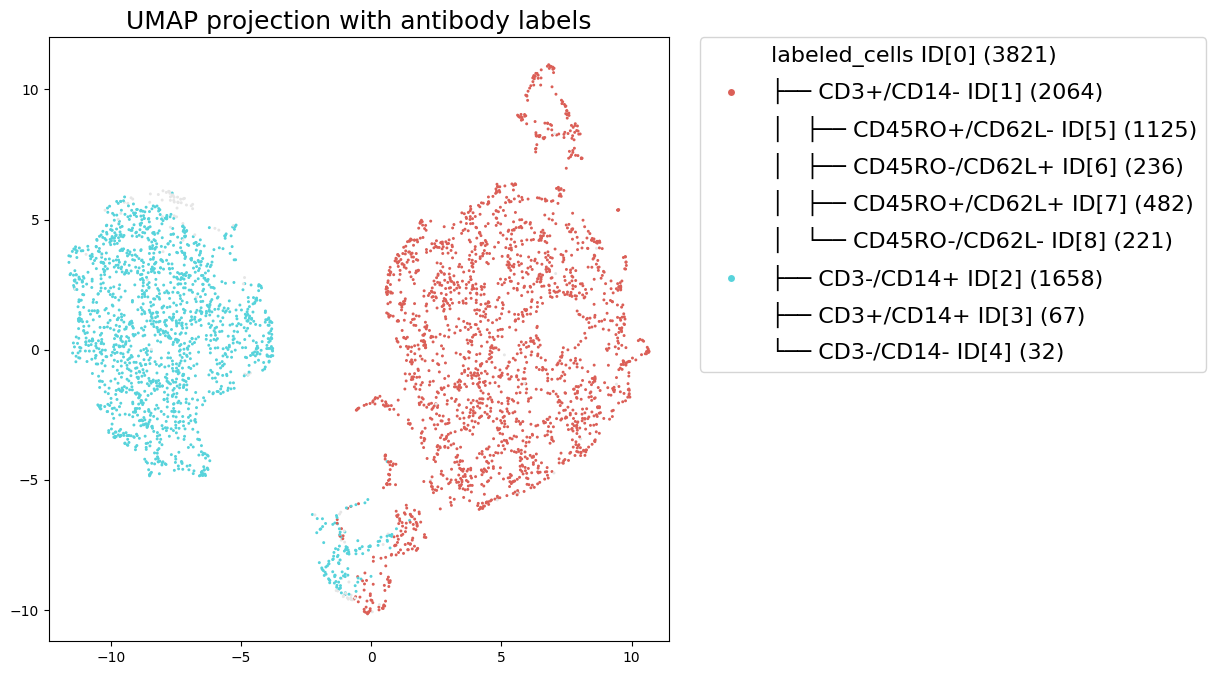

In [16]:
test_merge.umap_plot(label= test_merge.get_group_by_ID([1,2]),kind = 'tree',dpi = 100,marker_size=5, color_scheme='hls')

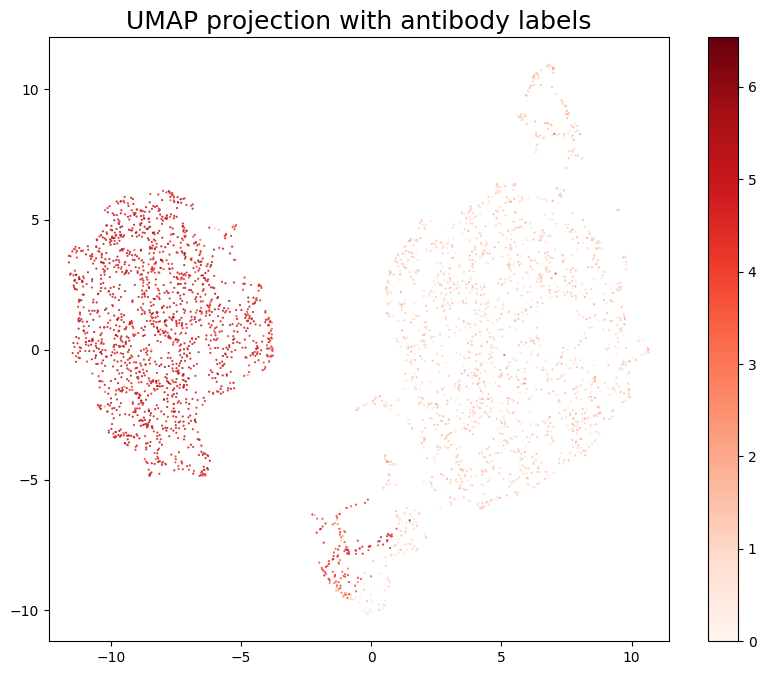

In [17]:
test_merge.umap_plot(label= 'CD14',kind = 'antibody',marker_size=1,dpi = 100,color_scheme='Reds')

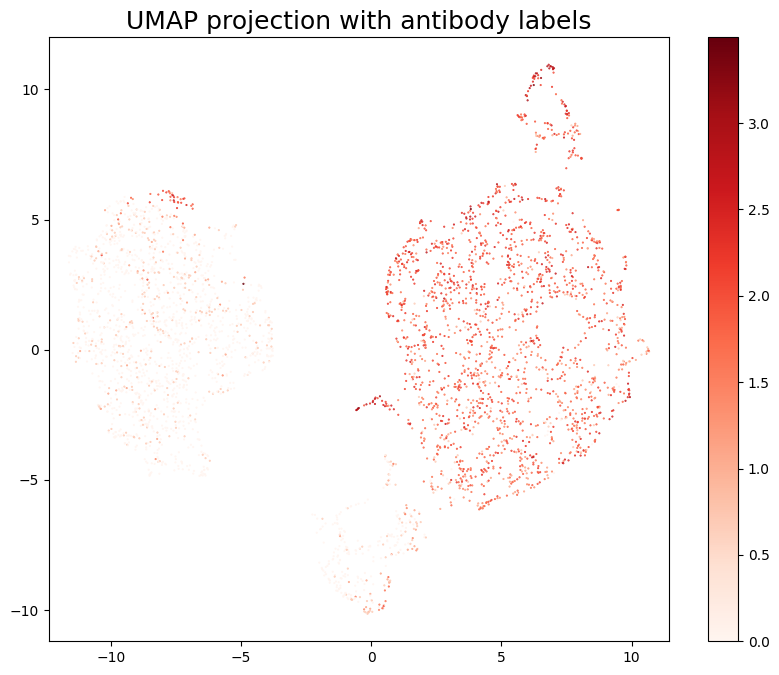

In [18]:
test_merge.umap_plot(label= 'CD3E',kind = 'gene',marker_size=1,dpi = 100,color_scheme='Reds')